In [33]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage

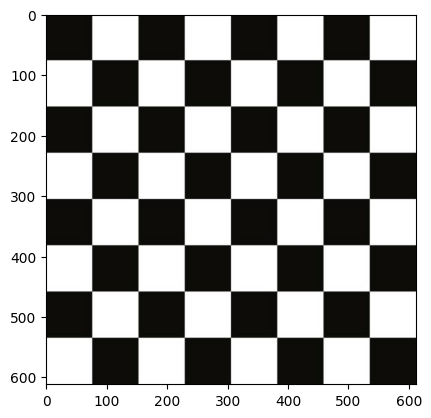

In [34]:
img = cv.imread('./img/chess.jpg')
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

In [35]:

X =[[1 , 0, -1],[2 , 0 , -2],[1 , 0, -1]]
X = np.array(X)

Y = X.T
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")
print(GAUSS)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [36]:
img1.shape

(612, 612)

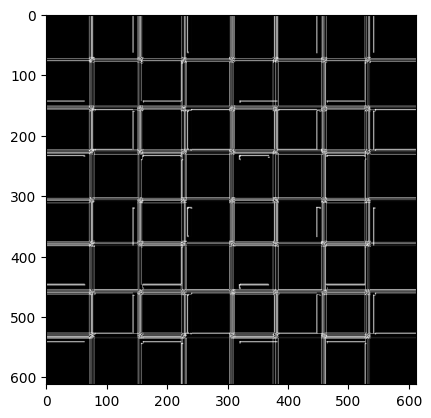

In [37]:
I_X = ndimage.convolve(img1,X)
I_Y = ndimage.convolve(img1,Y)
G = np.hypot(I_X,I_Y)

plt.imshow(G,cmap='gray')
plt.show()

In [38]:
Ixx = np.square(I_X)
IXX = ndimage.convolve(Ixx,GAUSS)
Iyy = np.square(I_Y)
IYY = ndimage.convolve(Iyy,GAUSS)

Ixy = I_X*I_Y
IXY = ndimage.convolve(Ixy,GAUSS)

Iyy.shape

(612, 612)

In [39]:
M = np.array([[IXX,IXY],[IXY,IYY]])
M.shape

(2, 2, 612, 612)

In [40]:
x , y = img1.shape
print(x)

612


In [41]:
RES = np.zeros((img1.shape))
k = 0.06
for i in range(x):
    for j in range(y):
        mat = M[ :,:,i,j]

        harris=np.linalg.det(mat) - k*(np.trace(mat)**2)
        
        RES[i,j] = harris

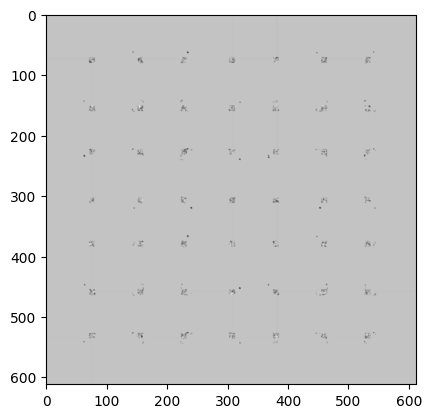

In [42]:
RES = (RES-RES.min())/(RES.max() - RES.min())*255
plt.imshow(RES,cmap='gray')
plt.show()

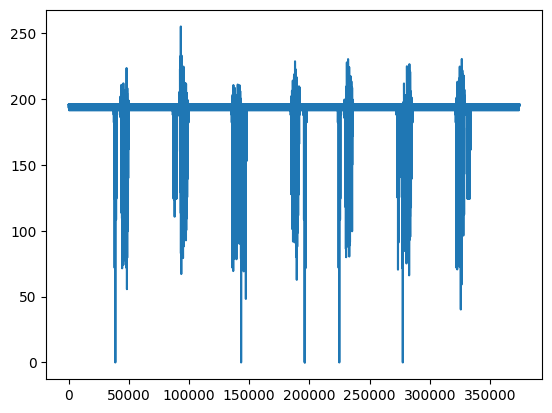

195.79928498467822


In [43]:
plott = RES.flatten()
plt.plot(plott)
plt.show()
print(RES[0,0])

In [44]:
COR = np.zeros((img1.shape))
max = RES.max()*0.78
for i in range(x):
    for j in range(y):
        if (RES[i,j]>max):
            COR[i,j] = RES[i,j]

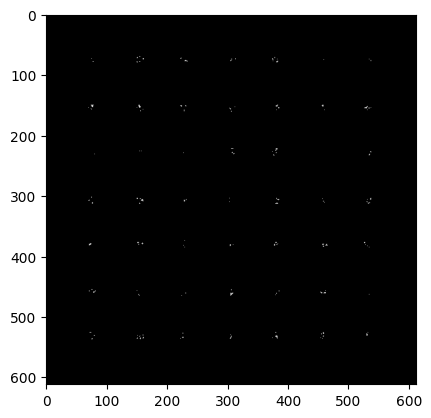

In [45]:
plt.imshow(COR,cmap='gray')
plt.show()

In [46]:

for i in range(x):
    for j in range(y):
        for k in range(-5,5):
            for l in range(-5,5):
                newx = i+k
                newy = j+l

                if (newx >=0 and newy>=0 and newx<x and newy<y and k!=0 and l!=0):
                    if (COR[i,j] < COR[newx][newy]):
                        COR[i,j] = 0

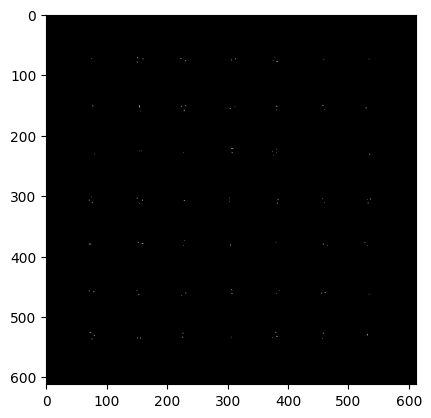

In [47]:
plt.imshow(COR,cmap='gray')
plt.show()

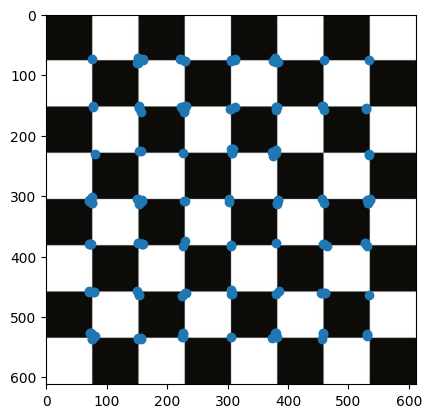

In [48]:
X,Y =np.where(COR.T != 0)
plt.imshow(img)
plt.scatter(X,Y)
plt.show()